In [1]:
import os
import time
from datetime import datetime, date

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns

from IPython.display import Image
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

In [2]:
time.asctime()

'Thu Aug 15 12:34:29 2019'

In [3]:
start_date = date(2018, 1, 1)

In [4]:
df = pd.read_csv('commits.tsv', sep='\t', index_col='sha')

# Organize datetimes
df.datetime = df.datetime.map(datetime.fromisoformat)

# Extract dates and slice by start date
df['date'] = df.datetime.map(datetime.date)
df = df[df.date > start_date]

# Calculate deltas versus minimum date
min_datetime = df.datetime.min()
df['delta'] = df.datetime.map(lambda x: (x - min_datetime).days)

# Order by datetime
df = df.sort_values('datetime')

df.head()

,category,repository,datetime,author,date,delta
sha,,,,,,
a48a092e,bel,pybel-resources,2018-01-02 10:30:10+01:00,Charles Tapley Hoyt,2018-01-02,0
44e24bcc,bel,pybel,2018-01-02 11:02:27+01:00,Charles Tapley Hoyt,2018-01-02,0
1ab63be0,bio2bel,hmdb,2018-01-02 11:10:10+01:00,Charles Tapley Hoyt,2018-01-02,0
08a4c5dc,bio2bel,hmdb,2018-01-02 11:10:17+01:00,Charles Tapley Hoyt,2018-01-02,0
ac4c7265,bio2bel,hmdb,2018-01-02 11:10:27+01:00,Charles Tapley Hoyt,2018-01-02,0


In [5]:
order = list(df.category.unique())
order

['bel',
 'bio2bel',
 'hbp',
 'sorger',
 'compath',
 'neurommsig',
 'fraunhofer',
 'guiltytargets',
 'writing',
 'rl',
 'teaching']

## Make a single plot

In [13]:
max_delta = df.delta.max()

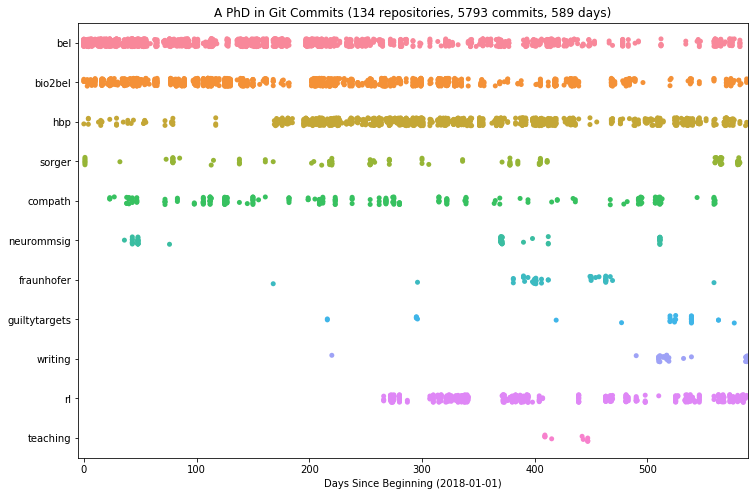

In [15]:
fig = plt.figure(figsize=(12, 8))
p = sns.stripplot(
    x='delta', 
    y='category', 
    data=df,
    order=order,
    jitter=True,
)
plt.xlim([-5, max_delta])
plt.title(f'A PhD in Git Commits ({df.repository.nunique()} repositories, {len(df)} commits, {df.delta.max()} days)')
plt.xlabel(f'Days Since Beginning ({start_date})')
plt.ylabel('')
plt.savefig('commits.png')
plt.show()

## Make many plots to combine later with imagemagick

In [16]:
plt.close(fig)

In [10]:
os.makedirs('img', exist_ok=True)

for day in tqdm(range(1, df.delta.max(), 5)):
    _df = df[df.delta < day]
    fig = plt.figure(figsize=(12, 8))
    p = sns.stripplot(
        x='delta', 
        y='category', 
        data=_df,
        order=order,
        jitter=True,
    )
    plt.xlim([-5, max_delta])
    plt.title(f'A PhD in Git Commits ({_df.repository.nunique()} repositories, {len(_df)} commits, {_df.delta.max()} days)')
    plt.xlabel(f'Days Since Beginning ({start_date})')
    plt.ylabel('')
    plt.savefig(os.path.join('img', f'commits_{day:03}.png'))
    plt.close(fig)
    

In [11]:
! convert -delay 20 -loop 0 img/*.png commits.gif

In [12]:
for name in os.listdir('img'):
    os.remove(os.path.join('img', name))
    
os.rmdir('img')